**FORECASTING REAL ESTATE PRICES USING TIME SERIES MODEL**


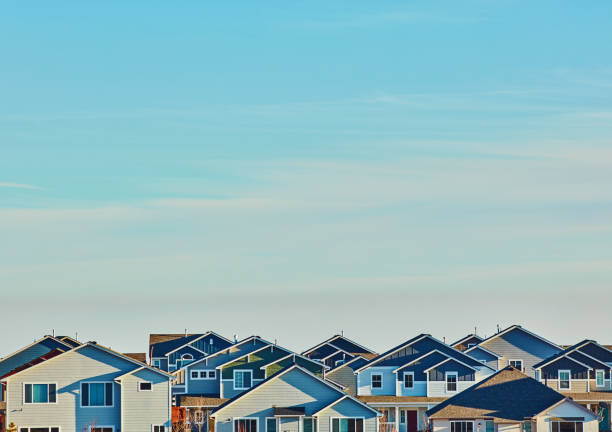


**DATA SCIENCE PHASE 4 PROJECT: MORINGA SCHOOL**

**GROUP 7 MEMBERS:**

*  JANET MUALUKO
*  ANDREW BARAKA
*  BRIAN MAINA
*  MILLICENT MUTHOMI
*  PHEMINA WAMBUI
*  CYNTHIA DALMAS




**INTRODUCTION**


Accurately predicting future prices has significant implications for buyers, sellers, and investors alike.This project uses time series analysis, a powerful tool for unraveling trends and patterns within sequential data. We leverage historical real estate price data, and aim to develop a robust forecasting model capable of predicting future values with greater accuracy.

This introduction sets the stage for us to explore the intricacies of data preparation, Exploratory data analysis, model selection, and evaluation, ultimately aiming to illuminate the path towards a more informed and predictable real estate future.





**BUSINESS UNDERSTANDING & PROBLEM STATEMENT**


The real estate market is complex and influenced by numerous factors, making
the identification of prime investment locations a significant challenge. Traditional methods often rely on limited data and subjective expertise, leading to inconsistencies and reduced decision-making power.

This project aims to develop a robust and data-driven model to identify the top 5 best zip codes for real estate investment. The model will leverage advanced analytics and machine learning techniques to analyze historical data on property characteristics, market trends, and economic indicators, providing clear and actionable insights for strategic investment decisions.


**OBJECTIVES**

1. Provide a valuable and accurate predictive time series model with improved accuracy for stakeholders in the real estate industry.
2. Identify the most significant factors influencing property values in real Eastate.
3. To achieve stationarity in the real estate price data which is crucial for many forecasting models.
4. To identify and account for potential trends in the real estate market:


**DATA UNDERSTANDING**

This project involves thoroughly understanding the real estate data with 272 columns and 14723 rows.  We explored the characteristics of the properties such as the RegionID,RegionName, City, State, Mtero,CountyName, SizeRank and changes in prices with time from the year 1996 to 2018.


**DATA PREPARATION**

In the data preparation process for real estate dataset,  we focused on data cleaning to check and handle missing values and address outliers, we performed  exploratory data analysis to understand data distribution and identify relationships and to make it ready for modelling.

**MODELLING**

We used ARIMA and SARIMA to model our dataset. SARIMA proved to be the best predicting upto XX% of change in price....................






## **STEP 1: DATA PREPARATION**

In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

We have imported the libraries that we will need in our noteboook

In [2]:
#Loading the dataset, and preview the first five rows
df = pd.read_csv("/Users/andrewbaraka/Downloads/zillow_data.csv")
df.head()


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [3]:
#Viewing the tail
df.tail(3)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400
14722,95851,89155,Mesquite,NV,Las Vegas,Clark,14723,176400.0,176300.0,176100.0,...,333800,336400,339700,343800,346800,348900,350400,353000,356000,357200


We have previewed the first 5 rows and the last 5 row and our data seems okay so far.

In [4]:
df.shape

(14723, 272)

Our dataset has 14,723 rows annd 272 columns.

We now preview the columns


In [5]:
df.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

There are too many columns so we melt the dataframe so as to convert the many date columns to one, make sure the date column is in the datetime datatype and set it as index

In [6]:
# Melt the DataFrame to convert wide format to long format
date_columns = df.columns[7:]
df_long = pd.melt(df, id_vars=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'],
                  value_vars=date_columns, var_name='Date', value_name='price')

# Convert the 'Date' column to datetime
df_long['Date'] = pd.to_datetime(df_long['Date'], format='%Y-%m')

# Set the 'Date' column as the index
df_long.set_index('Date', inplace=True)

# Check the first few rows to ensure the transformation is correct
df_long.head()


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,price
Date,,,,,,,,
1996-04-01,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0
1996-04-01,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0
1996-04-01,91982,77494,Katy,TX,Houston,Harris,3,210400.0
1996-04-01,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0
1996-04-01,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0


In [7]:
df_long.tail()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,price
Date,,,,,,,,
2018-04-01,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,209300.0
2018-04-01,59107,3293,Woodstock,NH,Claremont,Grafton,14720,225800.0
2018-04-01,75672,40404,Berea,KY,Richmond,Madison,14721,133400.0
2018-04-01,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,664400.0
2018-04-01,95851,89155,Mesquite,NV,Las Vegas,Clark,14723,357200.0


In [8]:
df_long.shape

(3901595, 8)

After melting down our dataset we also set date as datetime datatype. We preview the first and last 5 rows of our data.The data now has 3901595 rows and 8 columns.

In [9]:
#Checking the columns and data types
df_long.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3901595 entries, 1996-04-01 to 2018-04-01
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   RegionID    int64  
 1   RegionName  int64  
 2   City        object 
 3   State       object 
 4   Metro       object 
 5   CountyName  object 
 6   SizeRank    int64  
 7   price       float64
dtypes: float64(1), int64(3), object(4)
memory usage: 267.9+ MB


The data types are okay.

# **Data Cleaning**

**a). Missing Values**




In [10]:
#checking for missing values
df_long.isnull().sum()

RegionID           0
RegionName         0
City               0
State              0
Metro         276395
CountyName         0
SizeRank           0
price         156891
dtype: int64

The Metro and Price Columns have missing values and we are going to fill the missing values using the .bfill() method.

In [11]:
df = df_long.bfill()
#Confirming the null values were filled
df.isnull().sum()

RegionID      0
RegionName    0
City          0
State         0
Metro         0
CountyName    0
SizeRank      0
price         0
dtype: int64

We have filled the missing values and confirmed that there are no missing values.

**b). Dropping columns**

Since we have the RegionName column we shall drop the RegionID column because it is irrelevant.

In [12]:
#drop irrelevant columns
data = df.drop(['RegionID'], axis=1)
data.head()

,RegionName,City,State,Metro,CountyName,SizeRank,price
Date,,,,,,,
1996-04-01,60657,Chicago,IL,Chicago,Cook,1,334200.0
1996-04-01,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0
1996-04-01,77494,Katy,TX,Houston,Harris,3,210400.0
1996-04-01,60614,Chicago,IL,Chicago,Cook,4,498100.0
1996-04-01,79936,El Paso,TX,El Paso,El Paso,5,77300.0


In [13]:
data.columns

Index(['RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank',
       'price'],
      dtype='object')

We just confirmed that the column has been dropped.

**c). Handling Duplicates**

In [14]:
data.duplicated().sum()

677191

Our dataset has 677191 duplicated rows which we shall drop.

In [15]:
#drop the duplicated values
data_1 = data.drop_duplicates()
data_1.duplicated().sum()

0

We have confirmed that our dataset does not have any duplicates now.

In [16]:
data_1.shape

(3224404, 7)

Our data now have 3,224,404 rows after dropping duplicates and 7 columns

**d). Checking for Placeholders**


We need to check whether there are any placeholders in our data.

In [17]:
#Checking for placeholders
# Define a list of potential placeholder values
common_placeholders = ["", "NA", "N/A", "nan", "none", "null", "?", "unknown", "missing"]

# Loop through each column and check for potential placeholders
found_placeholder = False
for column in data_1.columns:
    unique_values = data_1[column].unique()
    for value in unique_values:
        if pd.isna(value) or (isinstance(value, str) and value.strip().lower() in common_placeholders):
            count = (data_1[column] == value).sum()
            print(f"Column '{column}': Found {count} occurrences of potential placeholder '{value}'")
            found_placeholder = True

if not found_placeholder:
    print("No placeholders found in the DataFrame.")

No placeholders found in the DataFrame.


Yeh! Our data does not have any placeholders so we proceed.

**e). Handling outliers**

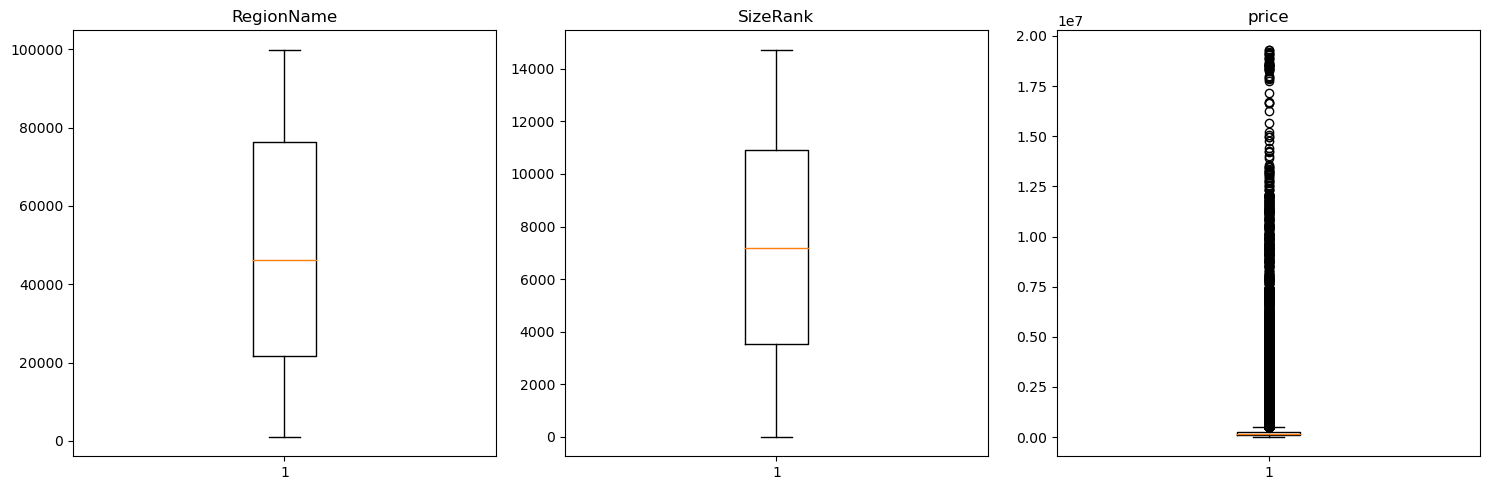

In [18]:
#Checking for outliers
numeric_columns = data_1.select_dtypes(include=['float64', 'int64', 'int32'])

# Plot box plots for each numeric column
num_cols = len(numeric_columns.columns)
cols_per_row = 3
num_rows = (num_cols - 1) // cols_per_row + 1

plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, cols_per_row, i+1)
    plt.boxplot(numeric_columns[col])
    plt.title(col)
plt.tight_layout()
plt.show()

The Sales column seems to have an outlier, lets take a look at the values

In [19]:
#Checking for unique values
data_1['price'].unique()

array([ 334200.,  235700.,  210400., ..., 2458000., 3069100., 2161900.])

In [20]:
#Checking for the maximum sales value
data_1['price'].max()

19314900.0

In [21]:
#Checking for the minimum sales amount
data_1['price'].min()

11300.0

There are outliers in our dataset but since we are doing a timeseries which is greatly affected by outliers we shall drop them.

In [22]:
# Calculate the Z-scores for the 'price' column
data_1['Z-score'] = (data_1['price'] - data_1['price'].mean()) / data_1['price'].std()

# Identify outliers
outliers = data_1[np.abs(data_1['Z-score']) > 3]

# Remove outliers
cleaned_data = data_1[np.abs(data_1['Z-score']) <= 3].copy()

# Drop the 'Z-score' column as it's no longer needed
cleaned_data.drop(columns=['Z-score'], inplace=True)


/var/folders/zb/8mcvjv4d1gd0k4hjdpzxw6bw0000gn/T/ipykernel_13978/3916941200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['Z-score'] = (data_1['price'] - data_1['price'].mean()) / data_1['price'].std()


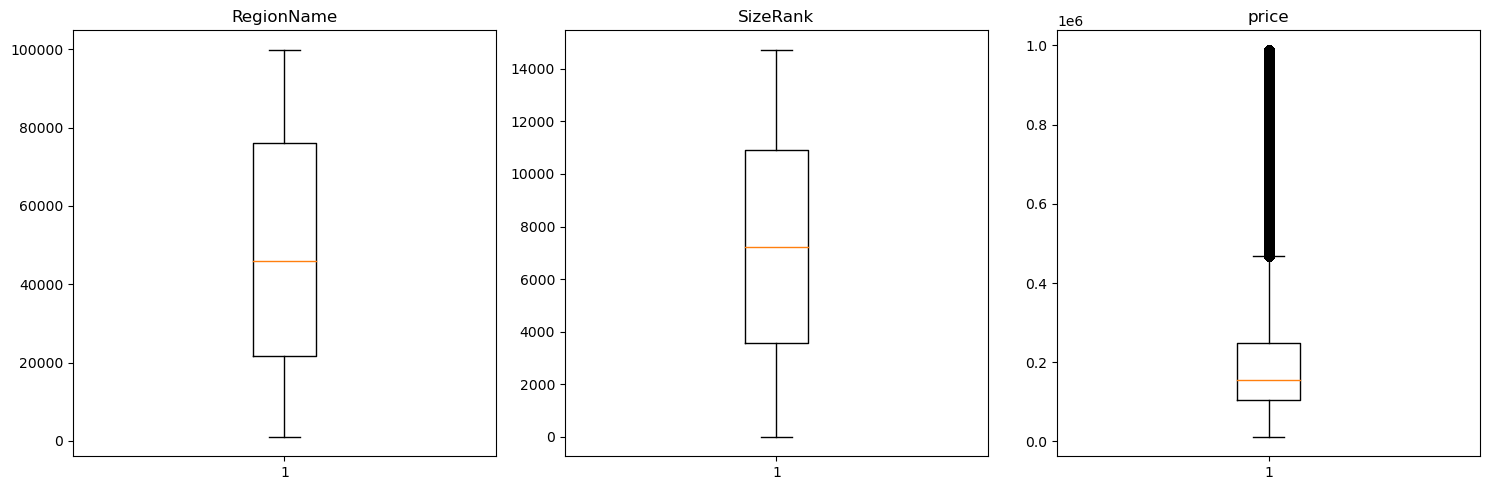

In [23]:
#Lets check if we still have outliers
numeric_columns = cleaned_data.select_dtypes(include=['float64', 'int64', 'int32'])

# Plot box plots for each numeric column
num_cols = len(numeric_columns.columns)
cols_per_row = 3
num_rows = (num_cols - 1) // cols_per_row + 1

plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, cols_per_row, i+1)
    plt.boxplot(numeric_columns[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**FEATURE ENGINEERING**

In [24]:
#renaming the columns
cleaned_data.rename(columns={
    'RegionName' : 'Region_Name',
    'CountyName' : 'County_Name',
    'SizeRank' : 'Size_Rank'
},inplace = True)

In [25]:
#renaming the columns
#cleaned_data.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
cleaned_data.head()

,Region_Name,City,State,Metro,County_Name,Size_Rank,price
Date,,,,,,,
1996-04-01,60657,Chicago,IL,Chicago,Cook,1,334200.0
1996-04-01,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0
1996-04-01,77494,Katy,TX,Houston,Harris,3,210400.0
1996-04-01,60614,Chicago,IL,Chicago,Cook,4,498100.0
1996-04-01,79936,El Paso,TX,El Paso,El Paso,5,77300.0


# **STEP 2: EXPLORATORY DATA ANALYSIS**

In [26]:
#Sampling the dataset
df = cleaned_data.sample(n=20000, replace=False)

#view te sampled dataset df
df.head()

,Region_Name,City,State,Metro,County_Name,Size_Rank,price
Date,,,,,,,
2008-04-01,31765,Meigs,GA,Thomasville,Thomas,13233,70700.0
1999-02-01,6105,Hartford,CT,Hartford,Hartford,4011,165300.0
2002-01-01,21678,Worton,MD,Springfield,Kent,13162,112300.0
2009-05-01,53104,Bristol,WI,Chicago,Kenosha,10188,225100.0
2016-07-01,29690,Travelers Rest,SC,Greenville,Greenville,5044,147000.0


In [27]:
df.shape

(20000, 7)

**Univariate Analysis**

<Axes: xlabel='Date'>

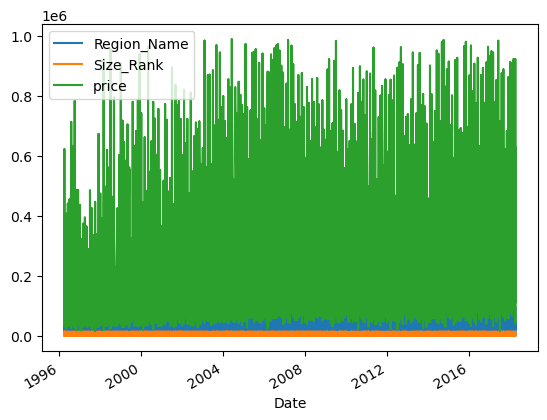

In [28]:
df.plot()

We are checking for the distribution of the prices column

In [29]:
#descriptive statistics
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Region_Name,20000.0,48363.06175,30060.116512,1001.0,21655.00,46117.5,76152.0,99901.0
Size_Rank,20000.0,7246.35175,4246.814628,1.0,3563.75,7197.0,10883.0,14723.0
price,20000.0,203836.18000,151363.340080,17300.0,104200.00,155950.0,250525.0,988800.0


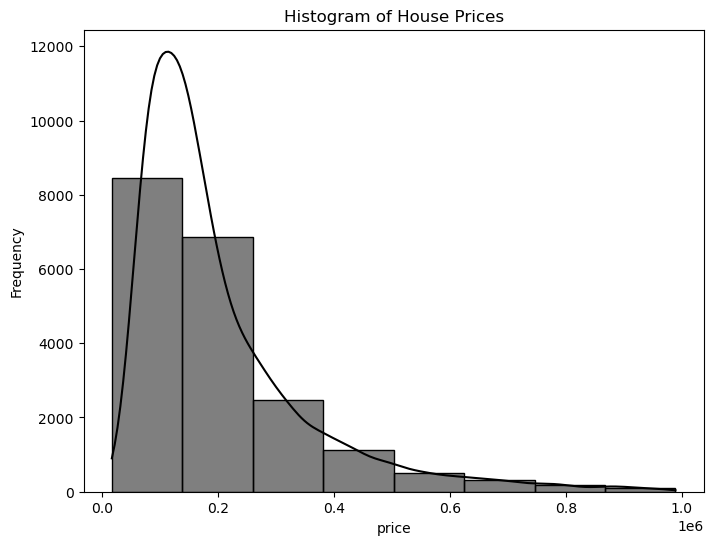

In [30]:
# Plot the histogram of house prices
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=8, kde=True, color='black')

# Add titles and labels
plt.title('Histogram of House Prices')
plt.xlabel('price')
plt.ylabel('Frequency')

# Show the plot
plt.show()

The sales prices have a right skew. Majority of the houses were sold at 2.5million to 3million.

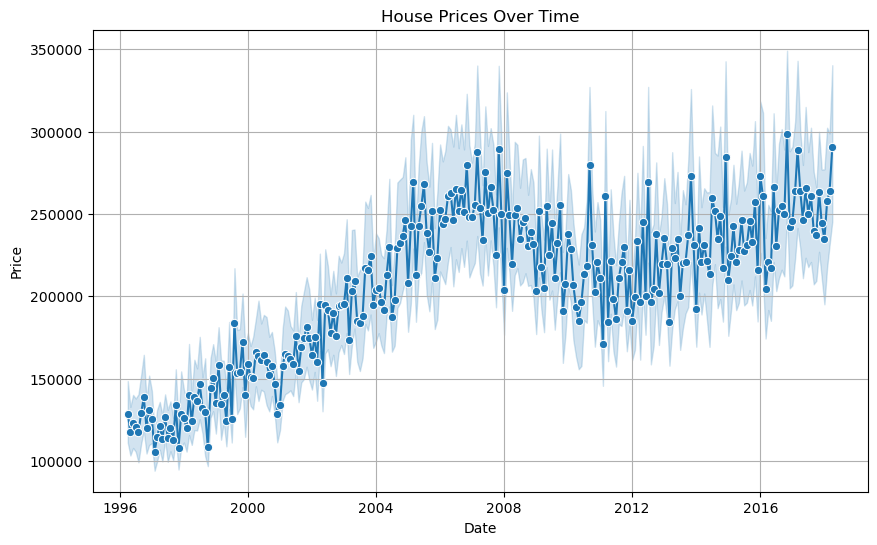

In [31]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='price', data=df, marker='o')

# Add titles and labels
plt.title('House Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

# Show the plot
plt.show()

There has been an upward trend in the value of properties over time.

**Checking for the relationship between Price and the top 20 states**

/var/folders/zb/8mcvjv4d1gd0k4hjdpzxw6bw0000gn/T/ipykernel_13978/1137472917.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='price', y='State', data=top_state, ci = None)


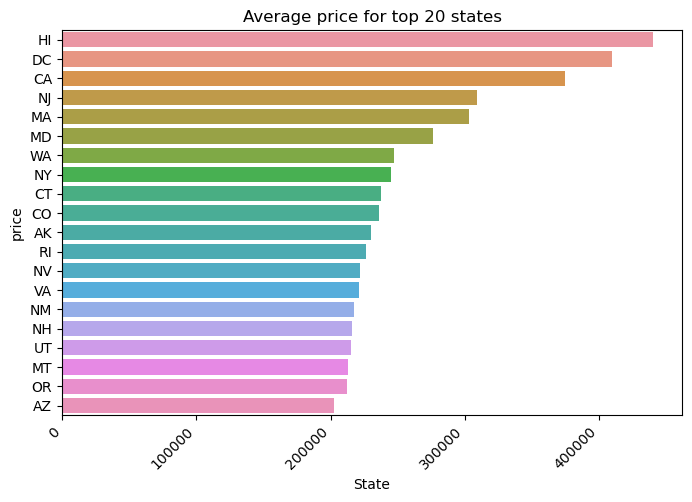

In [32]:
# Aggregate price data by state
state_prices = df.groupby('State')['price'].mean().reset_index()

# Sort by price and get the top 20 state
top_state=state_prices.sort_values(by='price', ascending=False).head(20)

plt.figure(figsize=(8,5))
ax = sns.barplot(x='price', y='State', data=top_state, ci = None)
plt.xticks(rotation=45, ha ='right')
plt.title('Average price for top 20 states')
plt.xlabel('State')
plt.ylabel('price')
plt.show()

The plots indicate that properties in Washington, D.C. have been consistently purchased at increasingly higher prices over time.

 **Checking for the relationship between Price and the top 10 cities.**



/var/folders/zb/8mcvjv4d1gd0k4hjdpzxw6bw0000gn/T/ipykernel_13978/3410905616.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='price', y='City', data=top_city, ci = None)


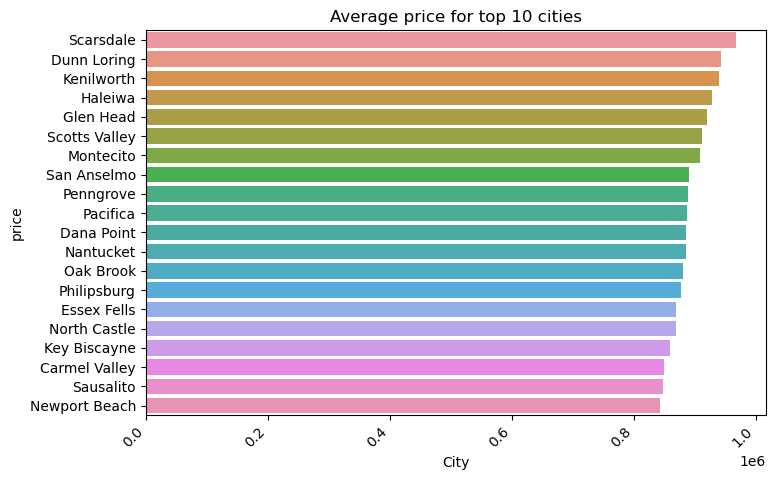

In [33]:
# Aggregate price data by city
city_prices = df.groupby('City')['price'].mean().reset_index()

# Sort by price and get the top 10 cities
top_city=city_prices.sort_values(by='price', ascending=False).head(20)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='price', y='City', data=top_city, ci = None)
plt.xticks(rotation=45, ha ='right')
plt.title('Average price for top 10 cities')
plt.xlabel('City')
plt.ylabel('price')
plt.show()

Foster city had the highest price followed by Malibu, Lexington Hills & Newport Beach.

**Checking for the relationship between Price and the top 10 Metro.**



In [34]:
metro_prices = cleaned_data.groupby('Metro')['price'].mean().reset_index()
# Sort by sales and get the top 20 metro areas
top_metro = metro_prices.sort_values(by='price', ascending=False).head(20)

/var/folders/zb/8mcvjv4d1gd0k4hjdpzxw6bw0000gn/T/ipykernel_13978/1201039876.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='price', y='Metro', data=top_metro, ci = None)


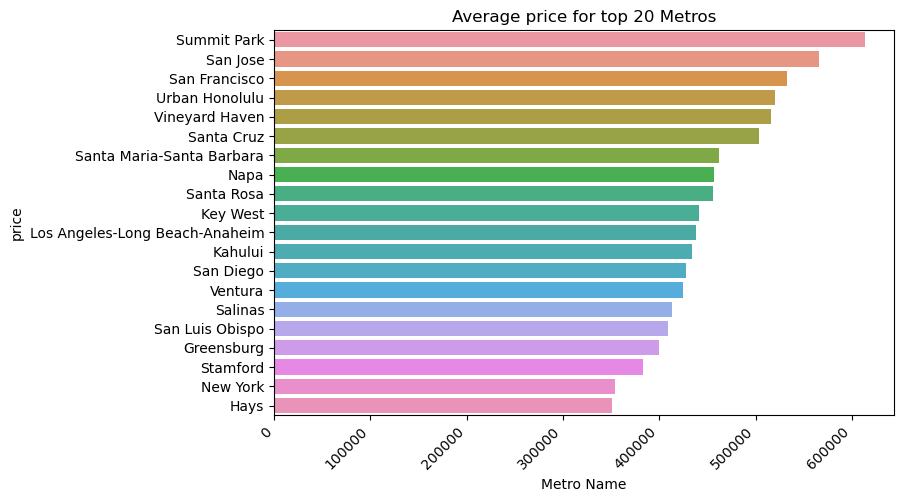

In [35]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='price', y='Metro', data=top_metro, ci = None)
plt.xticks(rotation=45, ha ='right')
plt.title('Average price for top 20 Metros')
plt.xlabel('Metro Name')
plt.ylabel('price')
plt.show()


- Checking relationship between country name & price

In [36]:
county_price = df.groupby('County_Name')['price'].mean().reset_index()
# Sort by sales and get the top 20 cities
top_counties = county_price.sort_values(by='price', ascending=False).head(20)

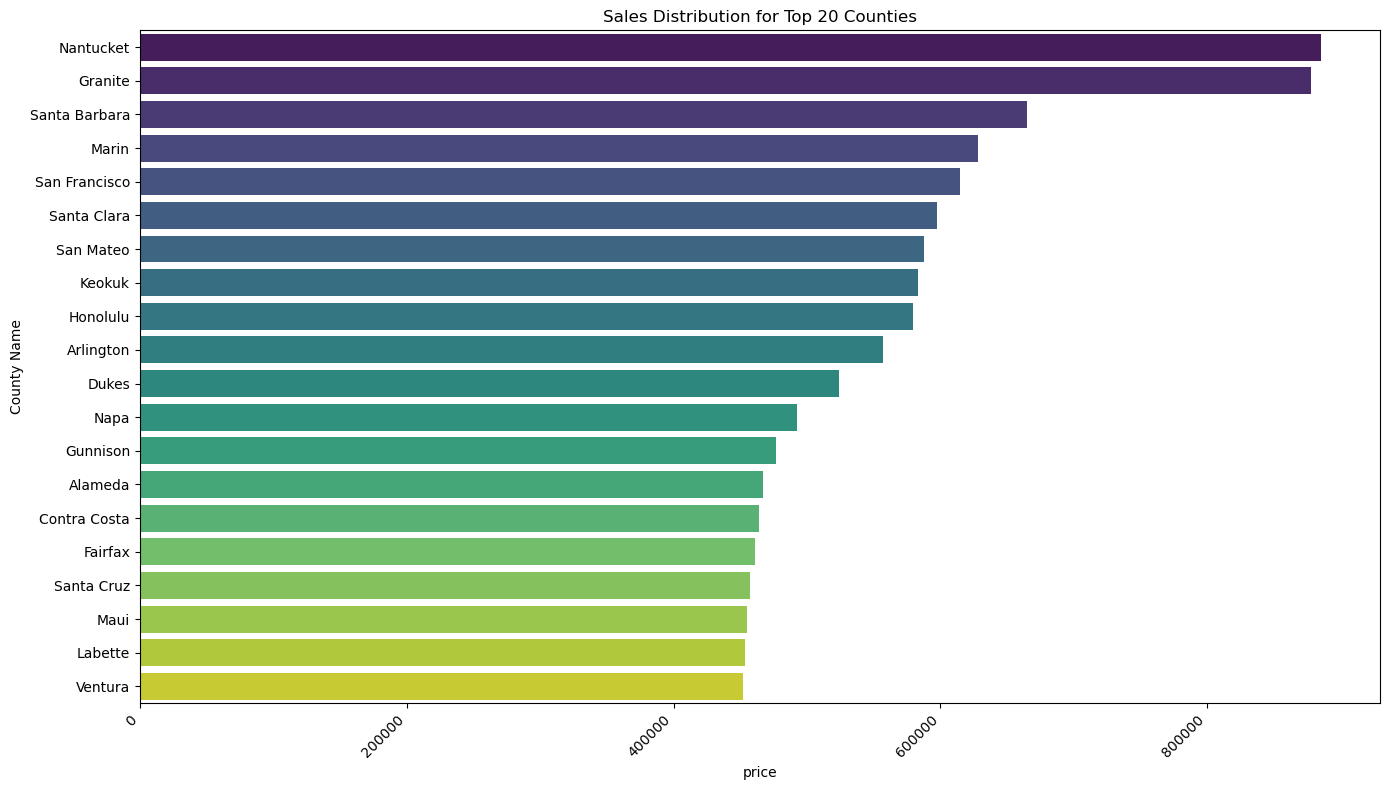

In [37]:
plt.figure(figsize=(14, 8))
sns.barplot(data=top_counties, y='County_Name', x='price', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Sales Distribution for Top 20 Counties')
plt.xlabel('price')
plt.ylabel('County Name')
plt.tight_layout()
plt.show()

- Checking relationship between siderank & price

In [38]:
sizerank_price = df.groupby('State')['Size_Rank'].mean().reset_index()
# Sort by sales and get the top 20 cities
top_rank = sizerank_price.sort_values(by='Size_Rank', ascending=False).head(20)

/var/folders/zb/8mcvjv4d1gd0k4hjdpzxw6bw0000gn/T/ipykernel_13978/1487183105.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Size_Rank', y='price', palette='viridis')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


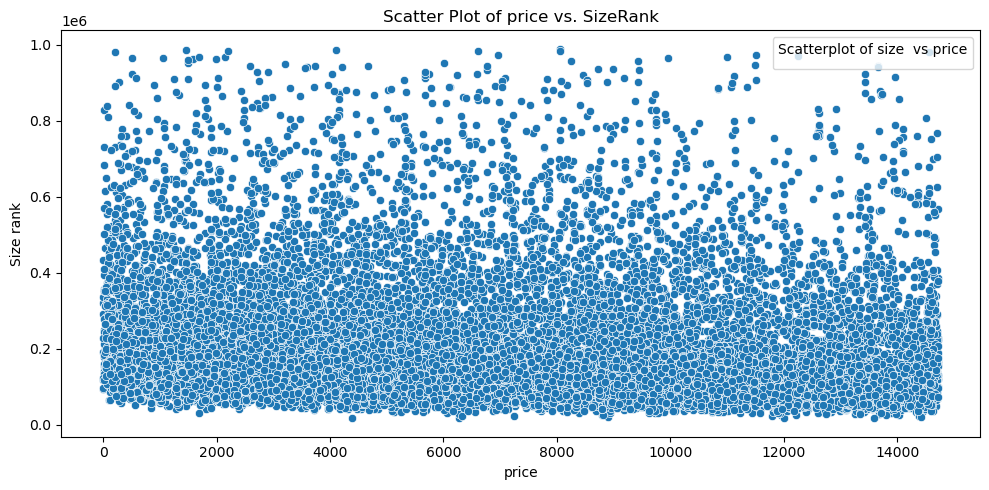

In [39]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Size_Rank', y='price', palette='viridis')
plt.title('Scatter Plot of price vs. SizeRank')
plt.xlabel('price')
plt.ylabel('Size rank')
plt.legend(title='Scatterplot of size  vs price')
plt.tight_layout()
plt.show()

## **STEP 3: Stationarity Check and Transformation**

We shall first check for stationarity by using a time series plot.

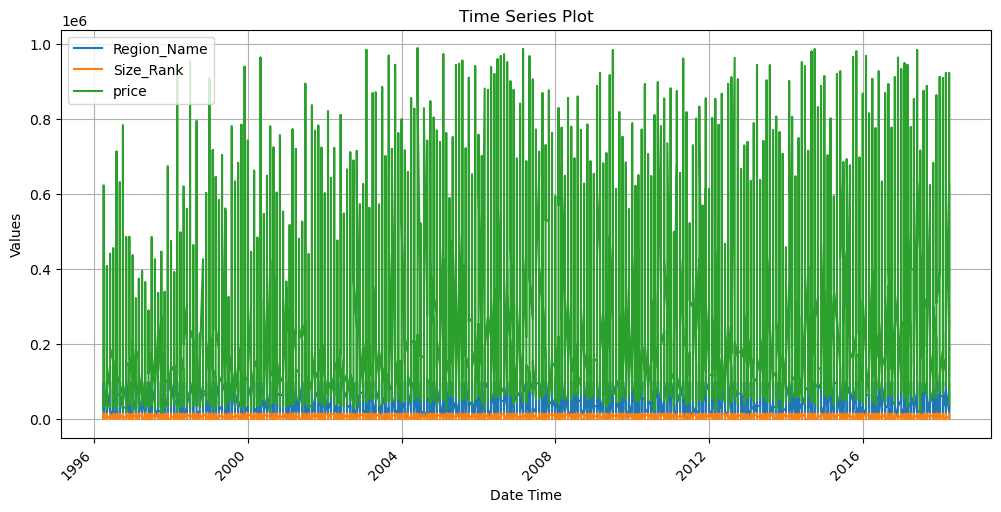

In [40]:
# Plot the entire dataframe
df.plot(figsize=(12, 6))

# Customize the plot (optional)
plt.xlabel("Date Time")
plt.ylabel("Values")
plt.title("Time Series Plot")
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability with dates

# Show the plot
plt.show()

Our dataset seems to be stationary but we can double check using the Augmented Dickey-Fuller test.

In [41]:
#A function to check for stationary
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series)
    print("P value:", result[1])

    if result[1]>0.05:
        print("Is non stationary")
    else:
        print("Is stationary")

In [42]:
#Using the function to check for stationarity
check_stationarity(df["price"])

P value: 0.0
Is stationary


Our dataset is stationary from the adfuller method.

<Figure size 1500x500 with 0 Axes>

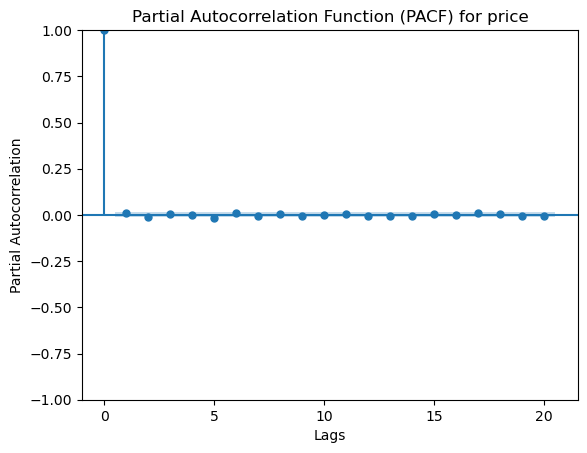

In [43]:
#Getting P,Q,& D
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#Plot partial autocorrelation (P)
plt.figure(figsize=(15, 5))
plot_pacf(df["price"],lags=20)
plt.xlabel("Lags")
plt.ylabel("Partial Autocorrelation")
plt.title("Partial Autocorrelation Function (PACF) for price")
plt.show()

<Figure size 1500x500 with 0 Axes>

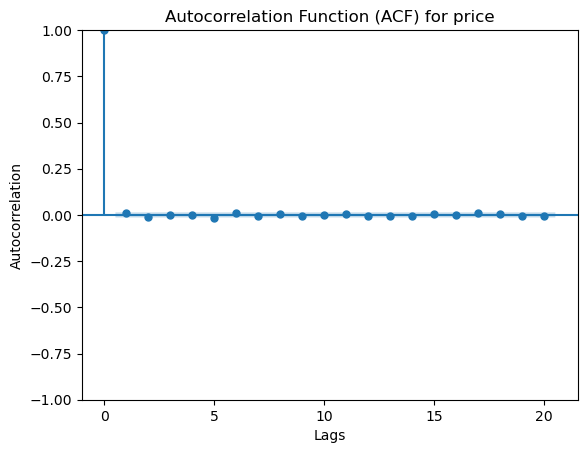

In [44]:
#Plot autocorrelation plot(Q)
plt.figure(figsize=(15, 5))
plot_acf(df["price"],lags=20);
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function (ACF) for price")
plt.show()


## **STEP 4: MODELLING**

**Fitting an ARIMA MODEL**

In [45]:
p,d,q = (4,1,3)

# Defining the ARIMA parameters
p = 3  # Autoregressive parameter
d = 1  # Differencing parameter
q = 2  # Moving average parameter

In [50]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(df["price"], order=(4,1,3))
arima_fit = arima.fit()

/Users/andrewbaraka/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/andrewbaraka/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/andrewbaraka/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/andrewbaraka/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  

In [51]:

# Printing the summary of the ARIMA model
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                20000
Model:                 ARIMA(4, 1, 3)   Log Likelihood             -266958.413
Date:                Sat, 29 Jun 2024   AIC                         533932.826
Time:                        21:27:46   BIC                         533996.053
Sample:                             0   HQIC                        533953.512
                              - 20000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6988      0.039    -43.502      0.000      -1.775      -1.622
ar.L2         -0.9397      0.040    -23.224      0.000      -1.019      -0.860
ar.L3         -0.0079      0.016     -0.497      0.6

The model seems to capture the autoregressive nature of the differenced data (diff1) with statistically significant coefficients for past values (ar.L1 to ar.L4). However, the moving average terms (ma.L1 to ma.L3) don't appear to have a strong influence. The high variance of the error term (sigma2) suggests there might be room for improvement.

In [52]:
# Calculating AIC value
aic_value = arima_fit.aic
print("AIC value:", aic_value)

AIC value: 533932.8255195577


- The AIC (Akaike Information Criterion) is a measure used to evaluate the goodness of fit of a statistical model. It balances the trade-off between the complexity of the model and its goodness of fit to the data. In the context of time series analysis and the ARIMA model, a lower AIC value indicates a better-fitting model.

- The lower the AIC value, the better the model fits the data

/Users/andrewbaraka/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/andrewbaraka/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Text(0.5, 1.0, '12 months forecast')

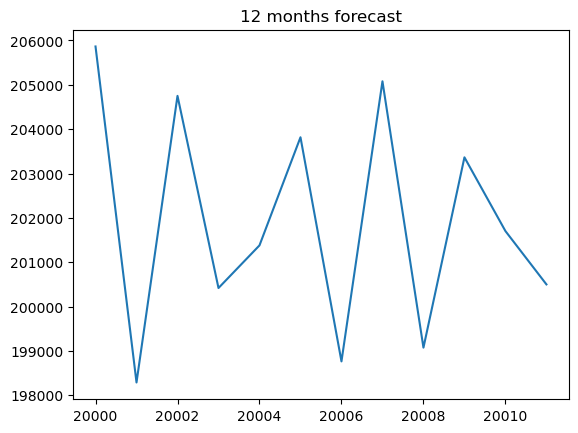

In [53]:
#predicting future 12 months
arima_fit.forecast(steps=12).plot()
plt.title('12 months forecast')

In [58]:
# from sklearn.metrics import mean_squared_error
# mse = np.sqrt(mean_squared_error(arima_fit, arima_fit.forecast))
# mse

In [59]:
p_values = range(0,5)
d_values = range(0,3)
q_values = range(0,5)

In [62]:
#Getting the optimal params function

import numpy as np
def find_optimal_params(series):
  """
  This function finds the optimal values for p, d, and q parameters for an ARIMA model.

  Args:
    series: A Pandas Series containing the time series data.

  Returns:
    A tuple containing the optimal values for p, d, and q.
  """

  min_aic = np.inf
  optimal_params = None

  for p in p_values:
    for d in d_values:
      for q in q_values:
        try:
          model = ARIMA(series, order=(p, d, q))
          result = model.fit()
          if result.aic < min_aic:
            min_aic = result.aic
            optimal_params = (p, d, q)
        except:
          continue

  return optimal_params


In [63]:
#show the optimal params

optimal_params = find_optimal_params('diff1')
print("Optimal parameters:", optimal_params)


Optimal parameters: None


**Fitting SARIMA Model**

In [65]:
# create sarima model

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the model
sarima_model = SARIMAX(df['price'], order=(4, 1, 2), seasonal_order=(4, 1, 2, 12))

# Fit the model
sarima_result = sarima_model.fit()

/Users/andrewbaraka/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/andrewbaraka/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/andrewbaraka/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/andrewbaraka/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35309D+01    |proj g|=  4.92965D-02


 This problem is unconstrained.



At iterate    5    f=  1.34867D+01    |proj g|=  6.04842D-02

At iterate   10    f=  1.34757D+01    |proj g|=  4.97338D-03

At iterate   15    f=  1.34742D+01    |proj g|=  2.06900D-03

At iterate   20    f=  1.34738D+01    |proj g|=  1.11983D-03

At iterate   25    f=  1.34738D+01    |proj g|=  7.78330D-05

At iterate   30    f=  1.34738D+01    |proj g|=  1.31594D-03

At iterate   35    f=  1.34737D+01    |proj g|=  1.55857D-04

At iterate   40    f=  1.34737D+01    |proj g|=  1.74117D-03

At iterate   45    f=  1.34737D+01    |proj g|=  1.43060D-04

At iterate   50    f=  1.34737D+01    |proj g|=  3.40888D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/andrewbaraka/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [73]:
# Make predictions
sarima_forecast = sarima_result.forecast(steps=12)


/Users/andrewbaraka/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [74]:
# Print the forecasted values
print("Forecasted Housing price:")
print(sarima_forecast)

Forecasted Housing price:
20000    202556.053110
20001    196049.605732
20002    204828.845832
20003    200995.127188
20004    200911.066002
20005    198972.453787
20006    197848.520859
20007    202971.504796
20008    200579.346374
20009    198805.690570
20010    200700.391353
20011    195901.163480
Name: predicted_mean, dtype: float64


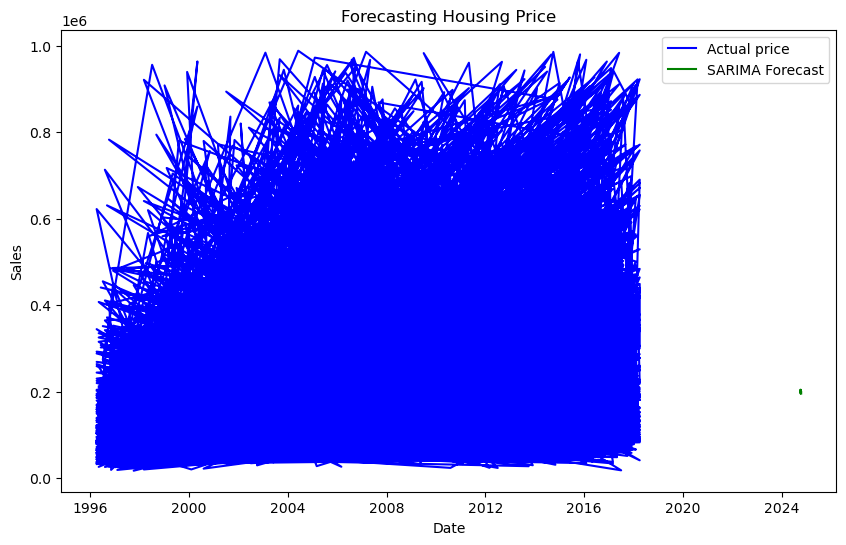

In [75]:
#visualize the forecasting
import matplotlib.pyplot as plt

# Plot the actual and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df["price"], label="Actual price", color="blue")
# plt.plot(arima_fit.forecast, label="ARIMA Forecast", color="red")
plt.plot(sarima_forecast, label="SARIMA Forecast", color="green")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Forecasting Housing Price")
plt.legend()
plt.show()

**FINDINGS**

**1.⁠ ⁠Price Trends:** Based on the model's forecasts, stakeholders can gain insights into anticipated price movements in the near future (e.g., next few months or year). This can inform decisions like buying, selling, or holding investment properties.

**2.⁠ ⁠Market Shifts:** The analysis might reveal potential turning points in the market, such as a shift from a buyer's to a seller's market. This knowledge allows stakeholders to adjust strategies and potentially gain a competitive edge.

**3.⁠ ⁠Risk Assessment:** The model's prediction intervals can indicate the level of uncertainty associated with the forecasts. This information helps stakeholders assess potential risks involved in real estate decisions.

**RECOMMENDATIONS**

**1.⁠ ⁠Property Valuation:** The model can be used to estimate a more data-driven value for specific properties, potentially improving the accuracy of appraisals.

**2.⁠ ⁠Targeted Investments:** By identifying factors influencing price fluctuations (e.g., location, property type), stakeholders can make more informed decisions about which properties might offer the best returns.

**3.⁠ ⁠Market Segmentation:** The analysis might reveal price variations within different segments of the market (e.g., luxury vs. affordable housing). This knowledge allows stakeholders to tailor their strategies to specific market segments.

**4.⁠ ⁠Continuous Improvement:** Recommend regularly updating the model with new data to maintain its accuracy and adapt to evolving market conditions.

**CONCLUSION**

In conclusion the project's value has reaffirmed how the time series analysis has provided valuable insights into market trends and price as the driver